# Cats Detection using YOLOv8

### Victor Nascimento Ribeiro

**This Notebook was initially a Technical Challenge for an internship position.**

no data avaliable :(

## Motivation

I decided to opt for fine-tuning the pre-trained `YOLOv8` model due to the presence of images that contain cats along with other animals. Therefore, I found it interesting to perform an object detection task to separate these animals and have a more accurate analysis of the images.

What also influenced this decision was the familiarity I already had with YOLO and the `ultralytics` library.

The small number of images was a challenge during the model inference. For this reason, I chose to use the `nano` version of the model, reserving only $5\%$ of the images for the `validation set`. Although I tested other dimensions of the model, as expected, the smaller version proved to be more efficient.


One possible improvement that I could have implemented would be the application of data augmentation techniques. However, due to the relatively short deadline, I did not have time to implement the strategy


## Libraries


In [ ]:
import os
import random
import shutil
import yaml

# !pip install -q ultralytics
from ultralytics import YOLO

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

## Organizing files

It is necessary to organize the folders to fit the YOLO standards.

This notebook was entirely made in `Google Colab`, so if you are going to use it in another environment, you will have to change the file paths.


In [ ]:
# extrai o arquivo 'zip'
!unzip -q /content/cats_dataset.zip
!rm  /content/cats_dataset-20231118T210856Z-001.zip

In [ ]:
# deleta a pasta das features extraidas (não usaremos)
!rm -rf /content/cats_dataset/features

In [ ]:
# organizando pastas do conjunto detreinamento
!mkdir /content/cats_dataset/train
!mkdir /content/cats_dataset/train/images

!mv /content/cats_dataset/imgs/* /content/cats_dataset/train/images
!mv /content/cats_dataset/labels /content/cats_dataset/train

!rm -rf /content/cats_dataset/imgs/

In [ ]:
# cria pastas do conjunto de validação
!mkdir /content/cats_dataset/valid
!mkdir /content/cats_dataset/valid/images
!mkdir /content/cats_dataset/valid/labels

## Creating the validation set

Since there are only a few images, I chose to separate only $5\%$ of the images for the validation set.


In [ ]:
def split_images(train_folder, valid_folder, eps=0.05):

    # Arquivos da pasta de treinamento (aonde estão todas as imagens)
    all_images = os.listdir(train_folder + '/images')
    all_labels = os.listdir(train_folder + '/labels')

    # Número de imagens para o conjunto de validação
    num_valid = int(len(all_images) * eps)

    # Separa imagens para o conjunto de validação "aleatoriamente"
    validation_imgs = random.sample(all_images, num_valid)
    validation_labels = [os.path.splitext(filename)[0] + '.txt'
                         for filename in validation_imgs]

    # Move as imagens selecionadas para a pasta de treinamento
    for image, label in zip(validation_imgs, validation_labels):
        # imagens
        source_path = os.path.join(train_folder + '/images', image)
        destination_path = os.path.join(valid_folder + '/images', image)
        shutil.move(source_path, destination_path)
        # labels
        source_path = os.path.join(train_folder + '/labels', label)
        destination_path = os.path.join(valid_folder + '/labels', label)
        shutil.move(source_path, destination_path)

    print(f"{num_valid} imagens foram movidas para o conjunto de validação.")

In [ ]:
train_folder = "/content/cats_dataset/train"
valid_folder = "/content/cats_dataset/valid"

split_images(train_folder, valid_folder)

12 imagens foram movidas para o conjunto de validação.


## Create YAML

The YAML file is used to provide information about the model training, including configurations such as paths to the training and validation data, output directories, learning parameters, among others.


In [ ]:
# Define as informações de treinamento
data = {
    'train': './train',
    'val': './valid',
    'nc': 1,
    'names': ['cat']
}

# define o path do arquivo
yaml_file_path = '/content/cats_dataset/data.yaml'

# Escreve informações do arquivo data.yaml
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)


print(f'YAML salvo em: {yaml_file_path}')

YAML salvo em: /content/cats_dataset/data.yaml


## Training

In [ ]:
# Carrega o modelo pré-treinado
model = YOLO('yolov8n.pt')

# Treinamento
results = model.train(task='detect',
                      mode='train',
                      data='/content/cats_dataset/data.yaml',
                      epochs=200,
                      imgsz=640,
                      optimizer='auto',
                      verbose=True)

100%|██████████| 6.23M/6.23M [00:00<00:00, 124MB/s]


Ultralytics YOLOv8.0.212 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/cats_dataset/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

100%|██████████| 755k/755k [00:00<00:00, 27.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/cats_dataset/train/labels... 229 images, 4 backgrounds, 0 corrupt: 100%|██████████| 229/229 [00:00<00:00, 847.10it/s] 

train: New cache created: /content/cats_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/cats_dataset/valid/labels... 12 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<00:00, 1473.15it/s]

val: New cache created: /content/cats_dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.49G      1.021      2.315      1.354         27        640: 100%|██████████| 15/15 [00:06<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         12         22    0.00556      0.909      0.502      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.35G     0.9684       1.61      1.334         24        640: 100%|██████████| 15/15 [00:05<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         12         22      0.552      0.449      0.498       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.34G       1.03      1.656      1.384         24        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         12         22      0.621      0.409      0.476      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.34G      1.072      1.582      1.417         20        640: 100%|██████████| 15/15 [00:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         12         22      0.571      0.182      0.272     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.37G      1.101      1.572      1.454         14        640: 100%|██████████| 15/15 [00:05<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         12         22      0.272      0.273       0.19     0.0722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.33G      1.162      1.565      1.461         18        640: 100%|██████████| 15/15 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         12         22      0.317      0.364      0.288       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.36G      1.199      1.597      1.489         20        640: 100%|██████████| 15/15 [00:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         12         22      0.244      0.591      0.285      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.37G      1.213      1.533      1.509         21        640: 100%|██████████| 15/15 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         12         22      0.377      0.227      0.154      0.061



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.37G      1.201      1.562      1.505         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         12         22      0.391      0.182      0.209      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.36G      1.243      1.506      1.537         20        640: 100%|██████████| 15/15 [00:05<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         12         22      0.435       0.28      0.248      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.23G      1.247      1.469      1.513         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         12         22      0.524      0.451       0.37       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.36G      1.181       1.44      1.476         34        640: 100%|██████████| 15/15 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         12         22      0.243      0.321      0.184     0.0695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.34G      1.141      1.373      1.444         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all         12         22      0.312      0.409      0.308      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.34G      1.106       1.37      1.411         23        640: 100%|██████████| 15/15 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         12         22      0.403      0.364      0.308      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.33G      1.128      1.366      1.437         12        640: 100%|██████████| 15/15 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         12         22      0.426      0.364      0.276      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.25G      1.075      1.283        1.4         19        640: 100%|██████████| 15/15 [00:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         12         22      0.467      0.455      0.465      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.34G      1.098      1.237      1.396         23        640: 100%|██████████| 15/15 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         12         22      0.607      0.409       0.51      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.36G      1.076      1.171        1.4         18        640: 100%|██████████| 15/15 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         12         22      0.451      0.561      0.511      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.24G      1.111      1.266      1.417         15        640: 100%|██████████| 15/15 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         12         22      0.352        0.5      0.296      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.34G      1.091      1.269      1.425         13        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         12         22      0.246      0.409      0.177     0.0694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.34G      1.068      1.213      1.378         17        640: 100%|██████████| 15/15 [00:05<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         12         22      0.511        0.5      0.434      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.34G      1.054      1.201      1.393         25        640: 100%|██████████| 15/15 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         12         22      0.337      0.455      0.361      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.36G      1.054      1.132      1.369         22        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         12         22      0.365      0.409      0.317      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.36G      1.075      1.154      1.382         23        640: 100%|██████████| 15/15 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         12         22      0.391      0.545      0.481      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.34G      1.028      1.141      1.328         26        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         12         22       0.38      0.455      0.317      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.35G      1.032      1.206      1.392          9        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         12         22      0.518      0.538      0.551      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.36G      1.021       1.14      1.381         22        640: 100%|██████████| 15/15 [00:05<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         12         22      0.493      0.455      0.375      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.36G      1.037      1.141       1.37         18        640: 100%|██████████| 15/15 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         12         22       0.66      0.591      0.493      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.36G     0.9553      1.032      1.301         22        640: 100%|██████████| 15/15 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         12         22      0.578      0.636      0.446      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.34G     0.9716      1.033        1.3         34        640: 100%|██████████| 15/15 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         12         22      0.642        0.5      0.534      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.33G      1.001      1.085      1.336         24        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         12         22      0.494      0.727      0.594      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.34G     0.9314      1.025      1.286         34        640: 100%|██████████| 15/15 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         12         22      0.772      0.409      0.425      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.25G     0.9134     0.9616      1.272         16        640: 100%|██████████| 15/15 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         12         22      0.685      0.455      0.456      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.34G     0.9452     0.9633      1.297         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         12         22      0.806      0.455      0.611       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.36G     0.9726      1.026       1.34         25        640: 100%|██████████| 15/15 [00:05<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         12         22      0.473      0.545      0.516      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.37G     0.9358     0.9898      1.277         12        640: 100%|██████████| 15/15 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         12         22      0.752      0.545      0.622      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.23G     0.9278     0.9796      1.274         26        640: 100%|██████████| 15/15 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         12         22      0.729      0.591      0.668      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.24G     0.9534     0.9772        1.3         17        640: 100%|██████████| 15/15 [00:05<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         12         22      0.746      0.545      0.582      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.34G     0.9153     0.9233      1.268         15        640: 100%|██████████| 15/15 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         12         22      0.531      0.727      0.569      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.34G     0.9248     0.9216      1.268         16        640: 100%|██████████| 15/15 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         12         22      0.742      0.364      0.485      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.34G     0.8775     0.9145      1.259         21        640: 100%|██████████| 15/15 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         12         22      0.703      0.539        0.6      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.36G     0.8911     0.9364      1.239         30        640: 100%|██████████| 15/15 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         12         22      0.488      0.519      0.481      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.36G     0.8787     0.9166      1.267         17        640: 100%|██████████| 15/15 [00:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         12         22      0.658        0.5      0.576      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.36G     0.8545     0.8898       1.23         31        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         12         22      0.597      0.636      0.554      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.34G     0.8203     0.8603      1.205         21        640: 100%|██████████| 15/15 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         12         22      0.745      0.533      0.573      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.36G     0.8275     0.8042      1.181         22        640: 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         12         22      0.794      0.528      0.631      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.35G     0.8531     0.8661       1.23         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         12         22      0.576        0.5      0.518      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.34G     0.8192     0.8185      1.188         27        640: 100%|██████████| 15/15 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         12         22      0.743      0.526      0.584      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.34G     0.8249     0.8585      1.217         17        640: 100%|██████████| 15/15 [00:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         12         22      0.544      0.455      0.447      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.34G     0.8462     0.8287      1.205         22        640: 100%|██████████| 15/15 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         12         22      0.644      0.591      0.522      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.37G     0.8669     0.8566      1.251         22        640: 100%|██████████| 15/15 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         12         22      0.711      0.448      0.476      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.32G      0.858     0.8588      1.244         24        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         12         22       0.66        0.5      0.508      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.34G     0.8285     0.8101      1.208         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         12         22      0.499      0.682      0.537       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.37G      0.802     0.7932      1.181         24        640: 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         12         22       0.48      0.682      0.547      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.35G     0.8211     0.7921      1.194         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         12         22      0.691      0.682       0.73      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.34G     0.8283     0.8111      1.202         18        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         12         22      0.628      0.682      0.661      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.34G      0.802     0.7424      1.185         28        640: 100%|██████████| 15/15 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         12         22      0.776      0.636      0.713      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.37G     0.8114     0.7792      1.207         14        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         12         22      0.646      0.636      0.622       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.33G     0.7936     0.7846      1.204         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         12         22      0.581      0.567      0.479      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.37G     0.7463     0.7217      1.136         12        640: 100%|██████████| 15/15 [00:04<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         12         22       0.66      0.591      0.624      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.36G     0.7916     0.7719      1.203         16        640: 100%|██████████| 15/15 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         12         22      0.655      0.591      0.628      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.37G     0.7579      0.725      1.142         27        640: 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         12         22       0.49      0.591      0.589      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.33G     0.7813     0.7487      1.173         21        640: 100%|██████████| 15/15 [00:05<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         12         22        0.7      0.636      0.658      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.37G     0.7687     0.7497      1.168         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         12         22      0.461      0.636      0.584      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.26G     0.7328     0.7205      1.136         40        640: 100%|██████████| 15/15 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all         12         22      0.484      0.545      0.464       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.32G     0.7179     0.6979      1.145         19        640: 100%|██████████| 15/15 [00:05<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         12         22      0.604      0.591       0.54      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.33G     0.7383     0.7435      1.161         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all         12         22      0.399      0.636       0.44      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.37G     0.7617     0.6917      1.155         34        640: 100%|██████████| 15/15 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         12         22      0.522      0.591      0.501      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.34G      0.703     0.6682      1.125         16        640: 100%|██████████| 15/15 [00:06<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         12         22      0.603      0.727      0.617      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.35G     0.7675      0.734      1.175         16        640: 100%|██████████| 15/15 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         12         22      0.778      0.636      0.651      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.24G     0.7071     0.6957      1.139         25        640: 100%|██████████| 15/15 [00:04<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         12         22      0.622      0.682      0.616      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.37G      0.702     0.6808      1.132         28        640: 100%|██████████| 15/15 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         12         22      0.615      0.655      0.601       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.34G     0.7344     0.6925      1.161         24        640: 100%|██████████| 15/15 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         12         22      0.684      0.727        0.7      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.34G     0.7633     0.7238      1.165         46        640: 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         12         22       0.63       0.62      0.633      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.36G      0.732     0.7184      1.133         22        640: 100%|██████████| 15/15 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         12         22      0.684        0.5      0.603      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.35G     0.7287     0.7064      1.145         16        640: 100%|██████████| 15/15 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         12         22      0.696      0.409        0.6      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.34G     0.6781     0.6543      1.118         18        640: 100%|██████████| 15/15 [00:06<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]


                   all         12         22      0.957      0.409      0.595      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.36G     0.7197     0.6389      1.126         23        640: 100%|██████████| 15/15 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         12         22      0.606      0.545      0.581      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.33G      0.732     0.6898       1.15         30        640: 100%|██████████| 15/15 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         12         22      0.542      0.636      0.596       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.37G     0.7215     0.6769      1.137         15        640: 100%|██████████| 15/15 [00:05<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         12         22      0.676      0.665      0.701      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.36G      0.716     0.6562      1.119         32        640: 100%|██████████| 15/15 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         12         22      0.685      0.545      0.685      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.33G     0.7134     0.6824      1.138         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         12         22      0.769      0.455       0.65      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.35G     0.7105     0.6676       1.13         19        640: 100%|██████████| 15/15 [00:05<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         12         22      0.632      0.636      0.674      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.32G     0.6912     0.6523      1.131         26        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         12         22      0.833      0.453       0.61      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.34G     0.6791      0.628      1.107         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all         12         22      0.718      0.579      0.705      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.36G     0.6725     0.6241      1.113         29        640: 100%|██████████| 15/15 [00:05<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         12         22      0.608      0.591      0.662       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.33G     0.6773     0.6246      1.111         23        640: 100%|██████████| 15/15 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         12         22      0.775      0.682      0.748      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.35G     0.6738     0.6382      1.112         15        640: 100%|██████████| 15/15 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         12         22      0.865      0.583      0.754      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.37G     0.6496     0.6313      1.089         30        640: 100%|██████████| 15/15 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         12         22      0.803      0.591      0.683      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.36G     0.6466     0.6093      1.102         23        640: 100%|██████████| 15/15 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         12         22       0.67      0.682      0.687      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.33G     0.6185     0.5541      1.055         23        640: 100%|██████████| 15/15 [00:06<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         12         22      0.686      0.727      0.717      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.37G     0.6714     0.6082      1.105         30        640: 100%|██████████| 15/15 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         12         22      0.731      0.682      0.718      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.34G      0.629     0.6043      1.084         39        640: 100%|██████████| 15/15 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         12         22      0.629      0.727       0.67      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.37G     0.6343     0.5809      1.067         18        640: 100%|██████████| 15/15 [00:05<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         12         22       0.63      0.727      0.738       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.36G     0.6179     0.5879      1.079         19        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         12         22      0.633      0.818      0.807      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.35G     0.6076     0.5828      1.078         22        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         12         22      0.917      0.545       0.77      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.36G     0.6398     0.5809      1.074         36        640: 100%|██████████| 15/15 [00:05<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         12         22      0.767      0.636      0.709      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.34G      0.604      0.555      1.065         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         12         22      0.825      0.636      0.722      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.33G     0.6599     0.6223       1.11         26        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         12         22      0.676      0.727      0.682      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.36G      0.637     0.5736      1.078         32        640: 100%|██████████| 15/15 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         12         22      0.644        0.5      0.537      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.37G     0.6186     0.5761      1.086         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         12         22      0.688      0.601       0.64      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.24G     0.5905     0.5506      1.068         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         12         22      0.599      0.455        0.5       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.33G      0.631     0.6036      1.102         10        640: 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         12         22       0.55      0.636      0.563      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.25G     0.6077     0.5759      1.067         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         12         22      0.635      0.792      0.732      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.23G     0.6498     0.5861      1.073         27        640: 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         12         22      0.826      0.727      0.725      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.37G     0.5996     0.5699      1.058         45        640: 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         12         22      0.702      0.642       0.66      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.33G     0.6273     0.5888      1.098         18        640: 100%|██████████| 15/15 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         12         22       0.68      0.818      0.768      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.34G     0.5853     0.5235      1.057         18        640: 100%|██████████| 15/15 [00:05<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         12         22      0.701      0.745      0.812      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.36G     0.5928     0.5618      1.078         25        640: 100%|██████████| 15/15 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         12         22       0.67      0.682      0.724      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.34G     0.6029     0.5493      1.086         24        640: 100%|██████████| 15/15 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         12         22       0.62      0.727      0.707      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.31G     0.5664      0.521      1.044         22        640: 100%|██████████| 15/15 [00:05<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         12         22          1      0.636      0.781      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.36G     0.6027     0.5394      1.063         18        640: 100%|██████████| 15/15 [00:04<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


                   all         12         22      0.917      0.727       0.82       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.32G     0.5584     0.5156      1.047         15        640: 100%|██████████| 15/15 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         12         22      0.802      0.636      0.744       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.37G     0.5632     0.5194      1.049         21        640: 100%|██████████| 15/15 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         12         22      0.697      0.682      0.702       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.33G     0.6205     0.5816      1.076         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         12         22      0.861      0.636      0.737      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.34G     0.5782     0.5481      1.038         18        640: 100%|██████████| 15/15 [00:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         12         22      0.745      0.591      0.616      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.34G     0.5691     0.5337      1.046         25        640: 100%|██████████| 15/15 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         12         22      0.818      0.636       0.66      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.23G     0.5411     0.5167      1.026         22        640: 100%|██████████| 15/15 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         12         22       0.85      0.591      0.682       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.22G     0.5604     0.5125      1.048         26        640: 100%|██████████| 15/15 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         12         22      0.775      0.628      0.654      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.34G     0.5345     0.4764      1.018         22        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         12         22      0.663      0.727      0.655      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.24G     0.5543     0.4837      1.035         33        640: 100%|██████████| 15/15 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         12         22      0.709      0.591      0.624      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.34G     0.5828     0.5206      1.063         24        640: 100%|██████████| 15/15 [00:05<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         12         22      0.865      0.585      0.637      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.35G     0.5568     0.4953      1.012         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         12         22      0.859      0.591      0.677      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.37G     0.5316     0.5045       1.03         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         12         22      0.923      0.544      0.655      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.36G     0.5488     0.5054      1.033         12        640: 100%|██████████| 15/15 [00:05<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         12         22      0.812      0.591      0.704      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.35G     0.5496     0.4929      1.034         16        640: 100%|██████████| 15/15 [00:04<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         12         22      0.694      0.636      0.675      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.35G     0.5216     0.4798       1.02         31        640: 100%|██████████| 15/15 [00:04<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         12         22      0.882      0.591       0.76      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.36G     0.5518     0.5112      1.043         22        640: 100%|██████████| 15/15 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         12         22      0.596       0.67      0.654      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.34G     0.5533     0.5301       1.03         16        640: 100%|██████████| 15/15 [00:03<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         12         22      0.666      0.682      0.669      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.23G     0.5455     0.4923      1.029         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         12         22      0.807      0.636      0.735      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.36G     0.5338     0.4976      1.016         19        640: 100%|██████████| 15/15 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         12         22      0.865      0.583      0.598      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.34G     0.5337     0.5075      1.027         21        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         12         22      0.778      0.545      0.557      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.34G     0.5091     0.4784      1.016         30        640: 100%|██████████| 15/15 [00:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         12         22      0.765      0.636      0.622      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.37G     0.5334     0.5037       1.02         18        640: 100%|██████████| 15/15 [00:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         12         22      0.806      0.591      0.646      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.22G     0.5226     0.4667     0.9989         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         12         22      0.719      0.591      0.695      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.34G     0.5249     0.4776      1.011         30        640: 100%|██████████| 15/15 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         12         22      0.808      0.591      0.692      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.37G     0.5255     0.4776      1.027         16        640: 100%|██████████| 15/15 [00:04<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         12         22      0.765      0.636      0.692      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.37G      0.531     0.4582      1.019         28        640: 100%|██████████| 15/15 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         12         22      0.815      0.545      0.671      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.36G     0.5011     0.4501      0.996         26        640: 100%|██████████| 15/15 [00:06<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         12         22      0.721      0.705      0.791      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.37G     0.5073     0.4554      1.004         19        640: 100%|██████████| 15/15 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         12         22      0.749      0.727      0.788      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.34G     0.5137     0.4674      1.019         19        640: 100%|██████████| 15/15 [00:04<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         12         22      0.883      0.545       0.71      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.34G     0.5076     0.4532      1.013         25        640: 100%|██████████| 15/15 [00:04<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         12         22      0.849        0.5      0.671      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.33G     0.5058     0.4445      1.003         27        640: 100%|██████████| 15/15 [00:04<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         12         22      0.859      0.636      0.737      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.34G     0.5291     0.4672      1.019         25        640: 100%|██████████| 15/15 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         12         22      0.794      0.591      0.717      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.36G     0.5012     0.4522      1.008         22        640: 100%|██████████| 15/15 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         12         22      0.692      0.636      0.704      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.35G     0.5392     0.4719      1.051         15        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         12         22      0.713      0.636      0.703      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.23G     0.4737     0.4525     0.9991          9        640: 100%|██████████| 15/15 [00:05<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         12         22      0.824        0.5      0.656      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.36G     0.5036     0.4418     0.9934         18        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         12         22      0.763      0.585      0.671      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.33G     0.5091     0.4639       1.04         16        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         12         22      0.708      0.661      0.666      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.27G     0.4855     0.4394     0.9809         11        640: 100%|██████████| 15/15 [00:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         12         22      0.696      0.636      0.657      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.23G     0.5158     0.4595      1.017         20        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         12         22      0.696      0.545      0.651      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.34G     0.5221     0.4453      1.025         29        640: 100%|██████████| 15/15 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         12         22      0.665      0.591      0.664      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.34G      0.475     0.4197      1.002         15        640: 100%|██████████| 15/15 [00:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         12         22      0.777        0.5       0.65      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.34G     0.4792     0.4347     0.9982         14        640: 100%|██████████| 15/15 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         12         22      0.792      0.545      0.645      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.33G     0.4809     0.4355     0.9979         13        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         12         22      0.757      0.591      0.645      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.24G     0.4745     0.4365     0.9915         17        640: 100%|██████████| 15/15 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]

                   all         12         22      0.698      0.636      0.637      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.37G     0.4896     0.4342          1         35        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         12         22       0.73      0.636      0.609      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.37G     0.4613     0.4038     0.9947         19        640: 100%|██████████| 15/15 [00:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         12         22      0.842      0.545      0.611      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.36G     0.4453     0.4156     0.9803         14        640: 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         12         22      0.832      0.545      0.616      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.32G     0.4487      0.401      0.994         24        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         12         22      0.648      0.586      0.613      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.37G     0.4731     0.4485      1.003          9        640: 100%|██████████| 15/15 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         12         22      0.764      0.636      0.621      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.34G     0.4299     0.3946     0.9694         24        640: 100%|██████████| 15/15 [00:04<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         12         22      0.692      0.636      0.616      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.36G     0.4667     0.4192     0.9861         25        640: 100%|██████████| 15/15 [00:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         12         22      0.791      0.591      0.611      0.415
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 113, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



163 epochs completed in 0.255 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.212 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


                   all         12         22      0.801      0.636      0.743      0.564
Speed: 1.1ms preprocess, 3.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


## Training Plots

In ./runs/detect/train, there are other interesting information about the model training.


In [ ]:
df = pd.read_csv('/content/runs/detect/train/results.csv')
df.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.02080,2.3153,1.3535,0.00556,0.90909,0.50203,0.28050,1.0204,2.8720,1.3209,0.000280,0.000280,0.000280
1,2,0.96836,1.6095,1.3342,0.55211,0.44855,0.49799,0.25048,1.1478,2.7254,1.5507,0.000577,0.000577,0.000577
2,3,1.03010,1.6556,1.3837,0.62096,0.40909,0.47589,0.24428,1.3658,2.5086,1.6905,0.000871,0.000871,0.000871
3,4,1.07160,1.5824,1.4169,0.57104,0.18182,0.27246,0.09466,1.8598,3.2868,2.3809,0.001162,0.001162,0.001162
4,5,1.10070,1.5715,1.4540,0.27241,0.27273,0.19037,0.07225,2.0143,2.9042,2.4371,0.001451,0.001451,0.001451


In [ ]:
def plot_graph(x, y1, y2=None):

    plt.figure(figsize=(9, 3.5))

    # Plot do 1° grafico
    plt.subplot(1, 2, 1)
    plt.plot(df[x], df[y1], label=y1)
    plt.title(y1)
    plt.xlabel(x)
    plt.ylabel(y1)
    plt.legend(fontsize=9)
    plt.grid(True)

    # plot do 2° grafico
    if y2 != None:
      plt.subplot(1, 2, 2)
      plt.plot(df[x], df[y2], label=y2)
      plt.title(y2)
      plt.xlabel(x)
      plt.ylabel(y2)
      plt.legend(fontsize=9)
      plt.grid(True)

    plt.tight_layout()
    plt.show()

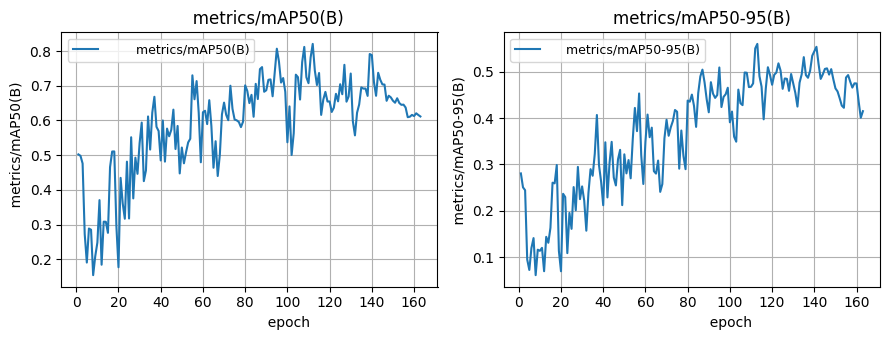

In [ ]:
# o título das colunas ficou um pouco bugado
plot_graph('                  epoch', '       metrics/mAP50(B)', '    metrics/mAP50-95(B)')

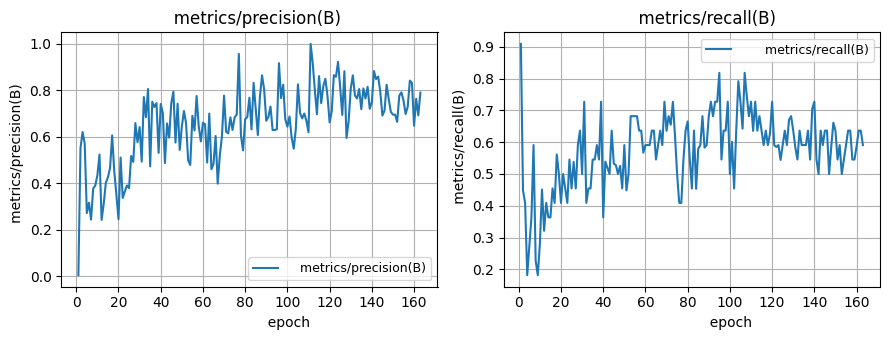

In [ ]:
plot_graph('                  epoch', '   metrics/precision(B)', '      metrics/recall(B)')

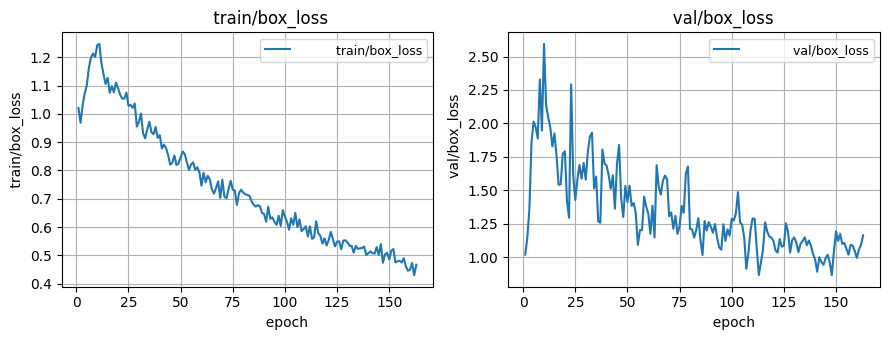

In [ ]:
plot_graph('                  epoch', '         train/box_loss', '           val/box_loss')

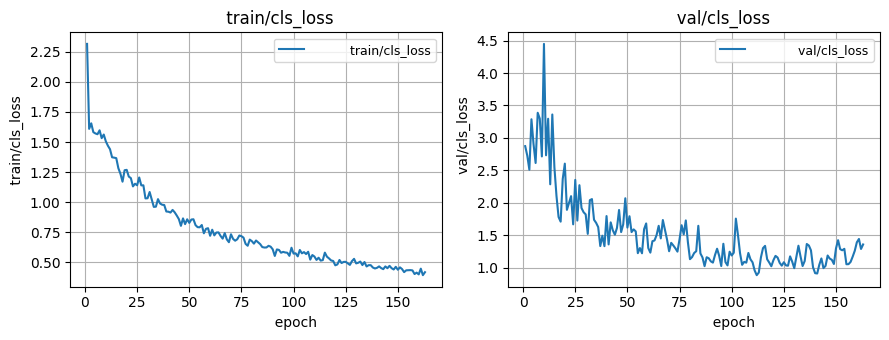

In [ ]:
plot_graph('                  epoch', '         train/cls_loss', '           val/cls_loss')

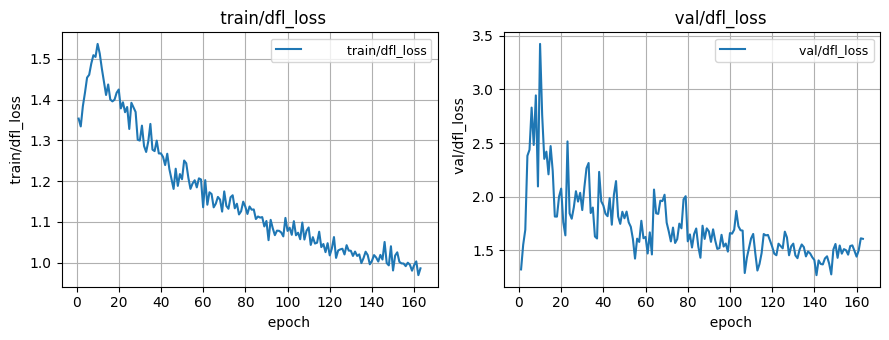

In [ ]:
plot_graph('                  epoch', '         train/dfl_loss', '           val/dfl_loss')

## Inference on test images

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

results = model.predict('/content/cats_dataset/inference_imgs/*', save=True, conf=0.5)


image 1/2 /content/cats_dataset/inference_imgs/405340C1-2E2D-4DA3-889F-14583CFFCEE8.JPG: 640x384 1 cat, 12.3ms
image 2/2 /content/cats_dataset/inference_imgs/E4F48723-FCE8-45F6-AC7E-4977A4E3EEEA.JPG: 640x480 1 cat, 12.2ms
Speed: 2.2ms preprocess, 12.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


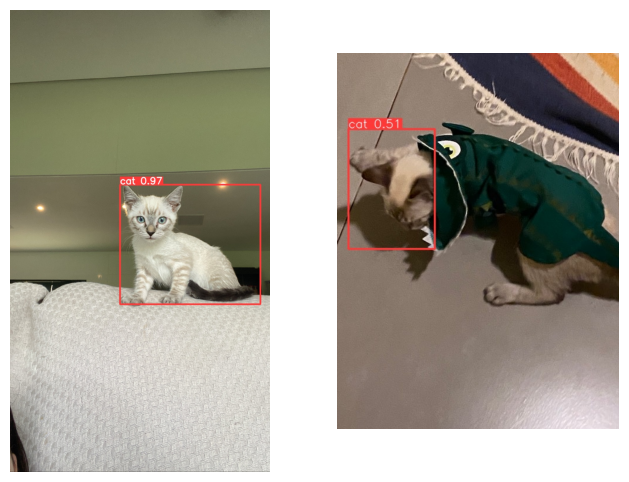

In [ ]:
# caminho das imagens
image1_path = '/content/runs/detect/predict/405340C1-2E2D-4DA3-889F-14583CFFCEE8.JPG'
image2_path = '/content/runs/detect/predict/E4F48723-FCE8-45F6-AC7E-4977A4E3EEEA.JPG'

# load nas imagens
image1 = Image.open(image1_path)
image2 = Image.open(image2_path)

# define o plot
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# plota as imagens
axes[0].imshow(image1)
axes[0].axis('off')
axes[1].imshow(image2)
axes[1].axis('off')

plt.show()

In [ ]:
# Salva modelo
shutil.make_archive('/content/runs', 'zip', '/content/runs')

'/content/runs.zip'

#       :)